In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.models.dcca import DeepCCA
from src.utils.embeddings import retrieve_all_embeds
from src.utils.files import save_as_pickle
from tensorflow import keras

In [3]:
model_path = "data/models/custom"
embed = retrieve_all_embeds([("data/features/use.pkl.train", "data/features/xception.pkl.train"), 
                             ("data/features/use.pkl.dev","data/features/xception.pkl.dev"),
                             ("data/features/use.pkl.test", "data/features/xception.pkl.test")])
X1_train, X1_dev, X1_test = embed["text only"]
X2_train, X2_dev, X2_test = embed["image only"]
outdim = 40
layers = [1024, 1024, 1024, outdim]
l2 = 1e-5
lr = 1e-3
epochs = 100
batch_size = 800
use_all_singular_values = True

In [7]:
dcca = DeepCCA(X1_train.shape[1], X2_train.shape[1], layers, l2, lr, outdim, use_all_singular_values, model_path)

In [8]:
dcca.train(X1_train, X2_train, X1_dev, X2_dev, batch_size, epochs)

Train on 6999 samples, validate on 1000 samples
Epoch 1/100
6400/6999 [==========================>...] - ETA: 0s - loss: -0.0578
Epoch 00001: val_loss improved from inf to -0.22108, saving model to data/models/custom/dcca_1
6999/6999 [==============================] - 3s 471us/sample - loss: -0.0701 - val_loss: -0.2211
Epoch 2/100
6400/6999 [==========================>...] - ETA: 0s - loss: -0.2318
Epoch 00002: val_loss improved from -0.22108 to -0.35425, saving model to data/models/custom/dcca_2
6999/6999 [==============================] - 2s 332us/sample - loss: -0.2407 - val_loss: -0.3542
Epoch 3/100
6400/6999 [==========================>...] - ETA: 0s - loss: -0.4041
Epoch 00003: val_loss improved from -0.35425 to -0.46016, saving model to data/models/custom/dcca_3
6999/6999 [==============================] - 2s 335us/sample - loss: -0.4068 - val_loss: -0.4602
Epoch 4/100
6400/6999 [==========================>...] - ETA: 0s - loss: -0.5593
Epoch 00004: val_loss improved from -0.460

Epoch 31/100
6400/6999 [==========================>...] - ETA: 0s - loss: -2.0024
Epoch 00031: val_loss improved from -1.43928 to -1.46057, saving model to data/models/custom/dcca_31
6999/6999 [==============================] - 2s 322us/sample - loss: -2.0145 - val_loss: -1.4606
Epoch 32/100
6400/6999 [==========================>...] - ETA: 0s - loss: -2.0271
Epoch 00032: val_loss improved from -1.46057 to -1.48195, saving model to data/models/custom/dcca_32
6999/6999 [==============================] - 2s 329us/sample - loss: -2.0386 - val_loss: -1.4819
Epoch 33/100
6400/6999 [==========================>...] - ETA: 0s - loss: -2.0618
Epoch 00033: val_loss did not improve from -1.48195
6999/6999 [==============================] - 2s 321us/sample - loss: -2.0622 - val_loss: -1.4805
Epoch 34/100
6400/6999 [==========================>...] - ETA: 0s - loss: -2.0783
Epoch 00034: val_loss improved from -1.48195 to -1.48249, saving model to data/models/custom/dcca_34
6999/6999 [===============

6400/6999 [==========================>...] - ETA: 0s - loss: -2.4793
Epoch 00064: val_loss did not improve from -1.50741
6999/6999 [==============================] - 2s 346us/sample - loss: -2.4704 - val_loss: -1.4970
Epoch 65/100
6400/6999 [==========================>...] - ETA: 0s - loss: -2.4725
Epoch 00065: val_loss did not improve from -1.50741
6999/6999 [==============================] - 2s 348us/sample - loss: -2.4731 - val_loss: -1.4906
Epoch 66/100
6400/6999 [==========================>...] - ETA: 0s - loss: -2.4707
Epoch 00066: val_loss did not improve from -1.50741
6999/6999 [==============================] - 3s 404us/sample - loss: -2.4759 - val_loss: -1.4857
Epoch 67/100
6400/6999 [==========================>...] - ETA: 0s - loss: -2.4941
Epoch 00067: val_loss did not improve from -1.50741
6999/6999 [==============================] - 3s 400us/sample - loss: -2.4894 - val_loss: -1.4958
Epoch 68/100
6400/6999 [==========================>...] - ETA: 0s - loss: -2.4785
Epoch 0

Epoch 99/100
6400/6999 [==========================>...] - ETA: 0s - loss: -2.7085
Epoch 00099: val_loss did not improve from -1.52410
6999/6999 [==============================] - 2s 325us/sample - loss: -2.7104 - val_loss: -1.4805
Epoch 100/100
6400/6999 [==========================>...] - ETA: 0s - loss: -2.7246
Epoch 00100: val_loss did not improve from -1.52410
6999/6999 [==============================] - 2s 330us/sample - loss: -2.7184 - val_loss: -1.4968


In [9]:
dcca.model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 512)]        0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 1000)]       0                                            
__________________________________________________________________________________________________
dense_24 (Dense)                (None, 1024)         525312      input_7[0][0]                    
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 1024)         1025024     input_8[0][0]                    
______________________________________________________________________________________________

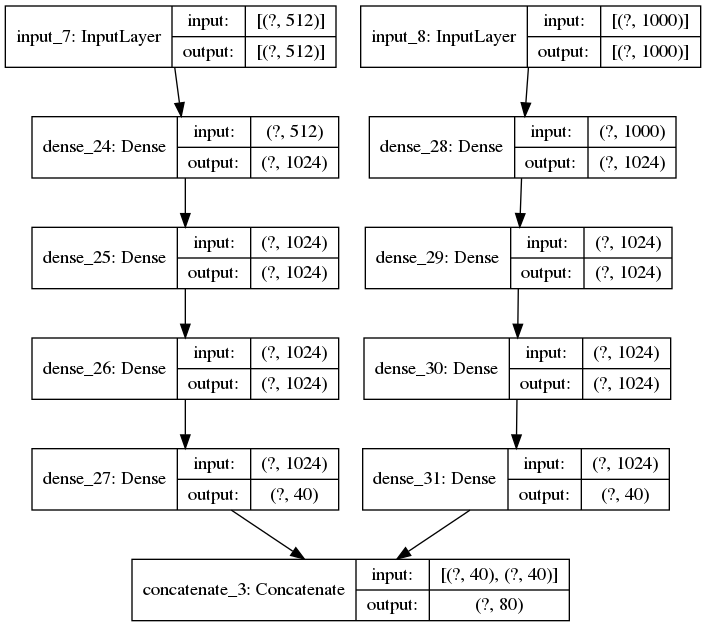

In [10]:
keras.utils.plot_model(dcca.model, "data/deepcca.png", show_shapes=True)

In [11]:
dev_res = dcca.test(X1_dev, X2_dev, batch_size)

1000/1000 [==============================] - 0s 68us/sample - loss: -1.4968
loss on test data: -1.4968098163604737


In [17]:
cca_embeds_test = dcca.predict(X1_test, X2_test, batch_size)
save_as_pickle(cca_embeds_test, "data/features/dcca.pkl.test")

Predicted values: [[ -9.594262    -0.21047823  -4.9731975  ...  -4.785173    -1.523529
   -1.3720297 ]
 [ -9.431799    -0.1902015   -4.6888504  ...  -4.7118616   -1.6749154
   -1.3313082 ]
 [ -9.737933    -0.32021287  -5.0959053  ...  -4.7245116   -1.383545
   -1.5416365 ]
 ...
 [-10.003963    -0.34688932  -4.6030803  ...  -4.5874205   -1.2759242
   -1.9268013 ]
 [-10.179113    -0.48863786  -5.1556177  ...  -4.434411    -1.4929621
   -1.7451932 ]
 [-10.117554    -0.44864845  -5.110246   ...  -4.7195973   -1.5260613
   -1.516095  ]]


In [19]:
cca_embeds_dev = dcca.predict(X1_dev, X2_dev, batch_size)
save_as_pickle(cca_embeds_dev, "data/features/dcca.pkl.dev")

Predicted values: [[ -9.162902    -0.33400756  -4.705291   ...  -5.1005683   -1.4996908
   -1.4731013 ]
 [-10.088688    -0.43019348  -5.0256553  ...  -4.628479    -1.4601033
   -1.5312988 ]
 [ -9.881315    -0.18971048  -4.8132505  ...  -4.4808154   -1.4817455
   -1.3679587 ]
 ...
 [-10.2131815   -0.5563436   -5.1786375  ...  -4.615299    -1.456666
   -1.5485749 ]
 [-10.104982    -0.38678676  -4.7781253  ...  -4.7093496   -1.460994
   -1.4963229 ]
 [-10.172824    -0.22831456  -4.8714247  ...  -4.766699    -1.5622711
   -1.4737322 ]]


In [20]:
cca_embeds_train = dcca.predict(X1_train, X2_train, batch_size)
save_as_pickle(cca_embeds_train, "data/features/dcca.pkl.train")

Predicted values: [[ -9.968042    -0.38640365  -5.1409082  ...  -5.1005683   -1.4996908
   -1.4731013 ]
 [-10.077911    -0.34685183  -4.8904305  ...  -4.7408476   -1.5930235
   -1.4613005 ]
 [-10.209297    -0.4937656   -4.9373317  ...  -4.6486244   -1.4319162
   -1.4357319 ]
 ...
 [ -8.066515    -0.57368404  -4.394086   ...  -4.4323635   -0.6144286
   -1.4391464 ]
 [-10.659291    -0.3814035   -5.547407   ...  -4.8236675   -1.5618751
   -1.02755   ]
 [ -9.6613655   -0.39666596  -4.7081404  ...  -4.682426    -1.4890265
   -1.5363867 ]]
